In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
data = data.drop(['Cabin'],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [80]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [81]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
data['Age'].median()

28.0

In [83]:
data['Age'] = data['Age'].fillna(data['Age'].median()) #fillna nothing but filling the missing the values 

In [84]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [85]:
data['Embarked'] = data['Embarked'].fillna('s')   #fillna nothing but filling the missing the values 

In [86]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [87]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [88]:
X = data.drop(['PassengerId','Name','Ticket','Survived'],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [89]:
y = data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [91]:
X1 = X.select_dtypes(exclude='float64')
X1.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S


In [92]:
X2 = X.select_dtypes(include='float64')
X2.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [93]:
x1 = pd.DataFrame()
cat_var = [i for i in X1.columns]
for var in cat_var:
    cat_list = 'var' + ' ' + var
    cat_list = pd.get_dummies(data[var],prefix=var)
    x1 = pd.concat([x1,cat_list],axis=1)

In [94]:
x1.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Embarked_s
0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [95]:
from sklearn.feature_selection import chi2

In [96]:
chi_scores = chi2(x1,y)
chi_scores

(array([5.51751510e+01, 6.16076687e+00, 4.15530709e+01, 1.70348127e+02,
        9.27024470e+01, 3.79935346e+00, 2.04294991e+01, 7.66193147e-01,
        1.21182053e+00, 3.58951682e+00, 3.11475410e+00, 4.36065574e+00,
        4.62827086e+00, 1.39161500e+01, 4.56427955e+00, 9.87834340e-01,
        2.49180328e+00, 7.14495255e-01, 6.22950820e-01, 2.04644013e+01,
        1.08467891e-02, 5.98483982e+00, 3.21052632e+00]),
 array([1.10253810e-13, 1.30614569e-02, 1.14714147e-10, 6.21058490e-39,
        6.07783826e-22, 5.12723773e-02, 6.18687479e-06, 3.81397315e-01,
        2.70971869e-01, 5.81451466e-02, 7.75861891e-02, 3.67781458e-02,
        3.14492437e-02, 1.91148980e-04, 3.26454024e-02, 3.20272257e-01,
        1.14440534e-01, 3.97955523e-01, 4.29952852e-01, 6.07507131e-06,
        9.17051963e-01, 1.44293530e-02, 7.31659445e-02]))

In [97]:
p_values = pd.Series(chi_scores[1],index=x1.columns)
p_values.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

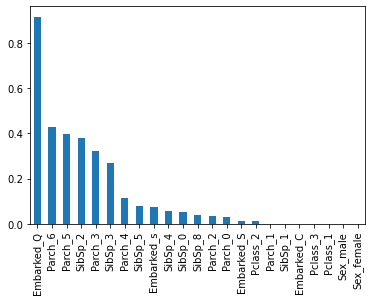

In [98]:
p_values.plot.bar()

In [99]:
from scipy.stats import pointbiserialr

In [100]:
pbc1 = pointbiserialr(X2.Age,y)
pbc1

PointbiserialrResult(correlation=-0.06491041993052588, pvalue=0.05276068847580145)

In [101]:
pbc2 = pointbiserialr(X2.Fare,y)
pbc2

PointbiserialrResult(correlation=0.2573065223849624, pvalue=6.120189341917992e-15)

In [102]:
x1.columns

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_s'],
      dtype='object')

In [103]:
a = ['Parch_1','SibSp_1','Embarked_C','Pclass_3','Pclass_1','Sex_male','Sex_female']


In [104]:
df1 = x1[a]
df1.head()

,Parch_1,SibSp_1,Embarked_C,Pclass_3,Pclass_1,Sex_male,Sex_female
0,0,1,0,1,0,1,0
1,0,1,1,0,1,0,1
2,0,0,0,1,0,0,1
3,0,1,0,0,1,0,1
4,0,0,0,1,0,1,0


In [105]:
df2 = X2['Fare']
df2.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [106]:
df = pd.concat([df1,df2],axis=1)
df.head()

,Parch_1,SibSp_1,Embarked_C,Pclass_3,Pclass_1,Sex_male,Sex_female,Fare
0,0,1,0,1,0,1,0,7.2500
1,0,1,1,0,1,0,1,71.2833
2,0,0,0,1,0,0,1,7.9250
3,0,1,0,0,1,0,1,53.1000
4,0,0,0,1,0,1,0,8.0500


In [52]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()

In [56]:
df = sc.fit_transform(df)
df

array([[-0.39070706,  1.80642129, -0.48204268, ...,  0.73769513,
        -0.73769513, -0.50244517],
       [-0.39070706,  1.80642129,  2.0745051 , ..., -1.35557354,
         1.35557354,  0.78684529],
       [-0.39070706, -0.55358072, -0.48204268, ..., -1.35557354,
         1.35557354, -0.48885426],
       ...,
       [-0.39070706,  1.80642129, -0.48204268, ..., -1.35557354,
         1.35557354, -0.17626324],
       [-0.39070706, -0.55358072,  2.0745051 , ...,  0.73769513,
        -0.73769513, -0.04438104],
       [-0.39070706, -0.55358072, -0.48204268, ...,  0.73769513,
        -0.73769513, -0.49237783]])

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [59]:
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.3,random_state=42)

In [60]:
model = GaussianNB()

In [61]:
model.fit(X_train,y_train)

GaussianNB()

In [63]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [64]:
model.score(X_train,y_train)

0.7736757624398074

In [66]:
b = {'actual' : y_test, 'predicted' : y_pred}
b

{'actual': 709    1
 439    0
 840    0
 720    1
 39     1
       ..
 821    1
 633    0
 456    0
 500    0
 430    1
 Name: Survived, Length: 268, dtype: int64,
 'predicted': array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0

In [67]:
pd.DataFrame(b)

,actual,predicted
709,1,1
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
accuracy_score(y_test,y_pred)

0.7798507462686567

In [70]:
model.score(X_train,y_train)

0.7736757624398074

In [71]:
confusion_matrix(y_test,y_pred)

array([[123,  34],
       [ 25,  86]], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       157
           1       0.72      0.77      0.74       111

    accuracy                           0.78       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



In [73]:
import seaborn as sns

In [107]:
df.head()

,Parch_1,SibSp_1,Embarked_C,Pclass_3,Pclass_1,Sex_male,Sex_female,Fare
0,0,1,0,1,0,1,0,7.2500
1,0,1,1,0,1,0,1,71.2833
2,0,0,0,1,0,0,1,7.9250
3,0,1,0,0,1,0,1,53.1000
4,0,0,0,1,0,1,0,8.0500


C:\Users\Mani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

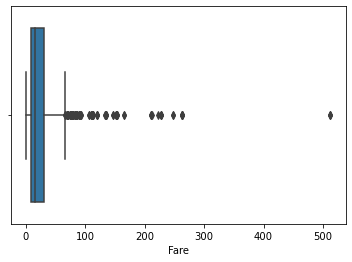

In [108]:
sns.boxplot(df['Fare'])

C:\Users\Mani\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Mani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

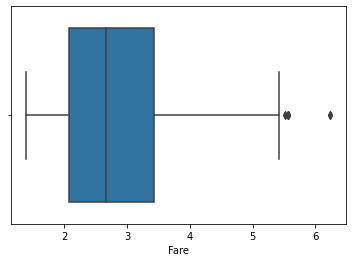

In [109]:
sns.boxplot(np.log(df['Fare']))

In [110]:
df['Fare'] = np.log(df['Fare'])

C:\Users\Mani\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [111]:
df.head()

,Parch_1,SibSp_1,Embarked_C,Pclass_3,Pclass_1,Sex_male,Sex_female,Fare
0,0,1,0,1,0,1,0,1.981001
1,0,1,1,0,1,0,1,4.266662
2,0,0,0,1,0,0,1,2.070022
3,0,1,0,0,1,0,1,3.972177
4,0,0,0,1,0,1,0,2.085672


In [112]:
np.sqrt(df['Fare'])

C:\Users\Mani\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      1.407481
1      2.065590
2      1.438757
3      1.993032
4      1.444186
         ...   
886    1.601546
887    1.844234
888    1.776196
889    1.844234
890    1.430976
Name: Fare, Length: 891, dtype: float64